In [18]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [19]:
import numpy as np
import pandas as pd

In [20]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [33]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [34]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [35]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [36]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [37]:
# Save references to each table
Mmt = Base.classes.measurement
Stn = Base.classes.station

In [44]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [48]:
 engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [49]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [50]:
 engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [51]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Climate Analysis

In [52]:
# Calculate the date 1 year ago from the last data point in the database
session.query(Mmt.date).order_by(Mmt.date.desc()).first()

('2017-08-23')

In [53]:
# Calculate the date 1 year ago from the last data point in the database
session.query(Mmt.date).\
    filter(Mmt.date > '2016-08-23').\
    order_by(Mmt.date).all()

[('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-02'

In [118]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Mmt.id, Mmt.station, Mmt.date, Mmt.prcp, Mmt.tobs).\
            filter(Mmt.date > '2016-08-22').\
            order_by(Mmt.date.desc()).all()
                
results

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0),
 (19548, 'USC00516128', '2017-08-21', 0.56, 76.0),
 (2721, 'USC00519397', '2017-08-20', 0.0, 81.0),
 (7633, 'USC00514830', '2017-08-20', 0.01, 80.0),
 (19547, 'USC00516128', '2017-08-20', None, 78.0),
 (2720, 'USC00519397', '2017-08-19', 0.0, 79.0),
 (7632, 'USC00514830', '2017-08-19', 0.0, 80.0),
 (12184, 'USC00519523', '2017-08-19', None, 85.0),
 (19546, 'USC00516128', '2017-08-19', 0.09, 71.0),
 (2719, 'USC00519397', '2017-08-18', 0.0, 80.0),
 (7631, 'USC00514830', '2017-08-18', 0.0, 77.0),
 (

In [127]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['id', 'station', 'date', 'prcp', 'tobs']).dropna()
df2 = df.loc[:,["date","prcp"]]
summary = df.groupby(["date"]).sum().reset_index()
# Sort the dataframe by date
summary2= summary.sort_values('date', ascending=False)

summary2.head(5)

,date,id,prcp,tobs
365,2017-08-23,42096,0.53,321.0
364,2017-08-22,34458,0.50,240.0
363,2017-08-21,29904,0.58,236.0
362,2017-08-20,10354,0.01,161.0
361,2017-08-19,29898,0.09,230.0


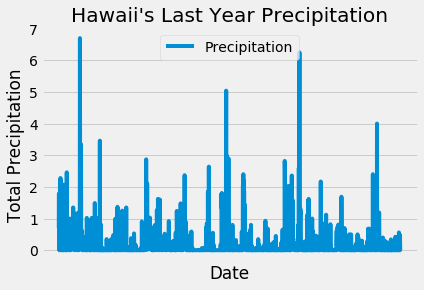

In [128]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(df.prcp, label = "Precipitation")
plt.xticks([],[])
plt.xlabel ("Date")
plt.ylabel("Total Precipitation")
plt.legend()
plt.title("Hawaii's Last Year Precipitation")
plt.gca().invert_xaxis()
plt.show()

In [131]:
# Use Pandas to calcualte the summary statistics for the precipitation data
stats = df2.describe()
stats

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [136]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Stn.name)).all()

[(9)]

In [135]:
# What are the most active stations? (i.e. what stations have the most rows)?
session.query(Stn.station, Stn.name).order_by(Stn.station.desc()).all()


[('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519281', 'WAIHEE 837.5, HI US'),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 ('USC00517948', 'PEARL CITY, HI US'),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US'),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00513117', 'KANEOHE 838.1, HI US'),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US')]

In [142]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
act = [Mmt.station, func.count(Mmt.date)]
total_activity = session.query(*act).\
                    group_by(Mmt.station).\
                    order_by(func.count(Mmt.date).desc()).all()
total_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [156]:
most_active =total_activity[0][0]
most_active

'USC00519281'

In [157]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
#highest temperature recorded, and average temperature most active station?
station_temp_cols = [func.min(Mmt.tobs),
                    func.max(Mmt.tobs),
                    func.avg(Mmt.tobs)]
station_temp = session.query(*station_temp_cols).\
                filter(Mmt.station == most_active).all()
station_temp

[(54.0, 85.0, 71.66378066378067)]

In [163]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_a_station = session.query(Mmt.station, Mmt.date, Mmt.prcp, Mmt.tobs).\
            filter(Mmt.station == 'USC00519281').\
            filter(Mmt.date > "2016-08-22").\
            order_by(Mmt.date.desc()).all()
                
most_a_station

[('USC00519281', '2017-08-18', 0.06, 79.0),
 ('USC00519281', '2017-08-17', 0.01, 76.0),
 ('USC00519281', '2017-08-16', 0.12, 76.0),
 ('USC00519281', '2017-08-15', 0.32, 77.0),
 ('USC00519281', '2017-08-14', 0.0, 77.0),
 ('USC00519281', '2017-08-13', 0.0, 77.0),
 ('USC00519281', '2017-08-06', 0.0, 83.0),
 ('USC00519281', '2017-08-05', 0.06, 82.0),
 ('USC00519281', '2017-08-04', 0.0, 77.0),
 ('USC00519281', '2017-07-31', 0.0, 76.0),
 ('USC00519281', '2017-07-30', 0.0, 81.0),
 ('USC00519281', '2017-07-29', 0.23, 82.0),
 ('USC00519281', '2017-07-28', 0.09, 81.0),
 ('USC00519281', '2017-07-27', 0.01, 76.0),
 ('USC00519281', '2017-07-26', 0.12, 75.0),
 ('USC00519281', '2017-07-25', 0.11, 77.0),
 ('USC00519281', '2017-07-24', 0.61, 75.0),
 ('USC00519281', '2017-07-23', 0.2, 82.0),
 ('USC00519281', '2017-07-22', 0.2, 77.0),
 ('USC00519281', '2017-07-21', 0.03, 77.0),
 ('USC00519281', '2017-07-20', 0.06, 77.0),
 ('USC00519281', '2017-07-19', 0.05, 76.0),
 ('USC00519281', '2017-07-18', 0.05, 76.

In [164]:
ma_df = pd.DataFrame(most_a_station, columns=['station', 'date', 'prcp', 'tobs'])#.dropna()
ma_tobs_df = ma_df.loc[:,["station","tobs"]]
ma_tobs_df.head(5)

,station,tobs
0,USC00519281,79.0
1,USC00519281,76.0
2,USC00519281,76.0
3,USC00519281,77.0
4,USC00519281,77.0


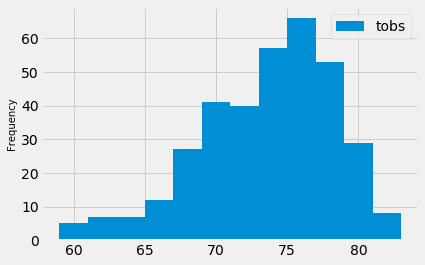

In [172]:
plt.hist(ma_tobs_df.tobs, bins=12, label="tobs")
plt.ylabel("Frequency", size= 10)
plt.legend()
plt.show()

# Optional Challenge Assignment

In [14]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [173]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.



In [174]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [175]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation